# Projeto: Previsão de custo de Plano de Saúde

### Neste projeto iremos usar quatro algoritmos de machine learning (regressão lasso, regressão linear, regressão ridge e random forest) para desenvolver uma metodologia para previsão do valor de planos de saúde para clientes de uma empresa que atua nesse ramo

![](https://static.poder360.com.br/2021/01/Fachada-Hospital-Sirio-Libanes-5-1024x683.jpg)

![](https://www.laceh.com.br/assets/img/time-health-21921b493ec688dafc41c449edddcba6a815387f12a2387b356e17c743905fd3.gif)

## O Brasil totalizou **48.566.216** beneficiários de planos de saúde em setembro de 2021. Este é o maior número de usuários desde abril de 2016.conforme ANS (Agência Nacional de Saúde Suplementar).

![](http://patrocinados.estadao.com.br/coren/10-campos-de-protagonismo-da-enfermagem-na-saude/assets/img/listicle-2.gif)



**Fonte da base de dados**: https://www.kaggle.com/datasets/mirichoi0218/insurance

## Informações sobre a base de dados

###Colunas

- age: idade do beneficiário

- sex: gênero

- bmi: Índice de Massa Corporal (IMC)

- children: filhos

- smoker: fumante

- region: região dos Estados Unidos onde o cliente reside 

- charges: Custo final do plano de saúde

# Análise Exploratória dos dados

## **Importação dos Pacotes**

Utilizaremos a linguagem de programação python e alguns dos muitos pacotes utilizados para análise de dados: "Numpy" para operações matemáticas, o pacote "Pandas" para nos auxiliar na manipulação e operações com o dataset, e os pacotes "Matplotlib" e "Seaborn" para gerar os gráficos e visualizações.

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##**Exploração e preparação do dataset**

In [70]:
# Realizando a leitura do arquivo csv:

data = pd.read_csv('Plano_de_Saúde.csv')

In [71]:
# Vendo o tipo de dado em cada uma das colunas
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3630 entries, 0 to 3629
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       3630 non-null   float64
 1   sex       3630 non-null   object 
 2   bmi       3630 non-null   float64
 3   smoker    3630 non-null   object 
 4   region    3630 non-null   object 
 5   children  3630 non-null   int64  
 6   charges   3630 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 198.6+ KB


In [72]:
# Quantidade de linhas e colunas contidas no dataset:
data.shape

(3630, 7)

In [73]:
# Utilizando a função head do pacote pandas para mostrar as primeiras 5 linhas do Dataframe
data.head()

,age,sex,bmi,smoker,region,children,charges
0,21.000000,male,25.745000,no,northeast,2,3279.868550
1,36.976978,female,25.744165,yes,southeast,3,21454.494239
2,18.000000,male,30.030000,no,southeast,1,1720.353700
3,37.000000,male,30.676891,no,northeast,3,6801.437542
4,58.000000,male,32.010000,no,southeast,1,11946.625900


In [74]:
# Renomeando colunas
data.columns

Index(['age', 'sex', 'bmi', 'smoker', 'region', 'children', 'charges'], dtype='object')

In [75]:
data.columns = ['Idade', 'Sexo', 'IMC', 'Fumante', 'Região', 'Dependentes','Preço']

Utilizei a função "head" para obter uma prévia das primeiras 5 linhas do dataframe, e mudei os nomes das colunas para facilitar nosso trabalho.

## **Tratando os valores nulos**

####Um problema muito comum que encontramos ao trabalhar com grandes conjuntos de dados é a existência de valores nulos ou não preenchidos, que podem existir por erros de preenchimento, erros na importação e transformação dos dados, não existência da informação, ou qualquer outro motivo.

####<p align="justify">O tratamento que iremos dar para os valores nulos depende do nosso objetivo com a análise de dados, podemos deixar os valores nulos caso eles não impactem negativamente na nossa análise, podemos apagar a linha inteira que possuí um valor nulo, podemos preencher os valores nulos com um valor específico, existem inúmeras formas de tratar valores nulos, mas sempre devemos manter em mente o nosso objetivo com a análise de dados para decidir qual tratativa utilizar.

####Para o nosso trabalho iremos substituir os valores nulos pela média correspondente de cada coluna.

In [76]:
# Visualizando a quantidade de valores nulos em cada coluna
data.isnull().sum()

Idade          0
Sexo           0
IMC            0
Fumante        0
Região         0
Dependentes    0
Preço          0
dtype: int64

### Verificando quantidade de linhas e colunas, quantidade de valores não-nulos por coluna, tipos de dados, entre outras informações da base de dados usando o método .info()



In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3630 entries, 0 to 3629
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Idade        3630 non-null   float64
 1   Sexo         3630 non-null   object 
 2   IMC          3630 non-null   float64
 3   Fumante      3630 non-null   object 
 4   Região       3630 non-null   object 
 5   Dependentes  3630 non-null   int64  
 6   Preço        3630 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 198.6+ KB


In [79]:
# Descrição estatística das colunas númericas da base de dados:
data.describe()

,Idade,IMC,Dependentes,Preço
count,3630.000000,3630.000000,3630.000000,3630.000000
mean,38.887036,30.629652,2.503581,12784.808644
std,12.151029,5.441307,1.712568,10746.166743
min,18.000000,15.960000,0.000000,1121.873900
25%,29.000000,26.694526,1.000000,5654.818262
50%,39.170922,30.200000,3.000000,9443.807222
75%,48.343281,34.100000,4.000000,14680.407505
max,64.000000,53.130000,5.000000,63770.428010


In [80]:
# Descrição das colunas categóricas da base de dados:
data.describe(include=['O'])

,Sexo,Fumante,Região
count,3630,3630,3630
unique,2,2,4
top,male,no,southeast
freq,2029,3070,1021


In [81]:
# Categorias da coluna "Região"

data['Região'].unique()

array(['northeast', 'southeast', 'northwest', 'southwest'], dtype=object)

# Visualização dos dados por meio diversos tipos de gráficos

In [82]:
import matplotlib.style as style
#style.available
style.use('fivethirtyeight')

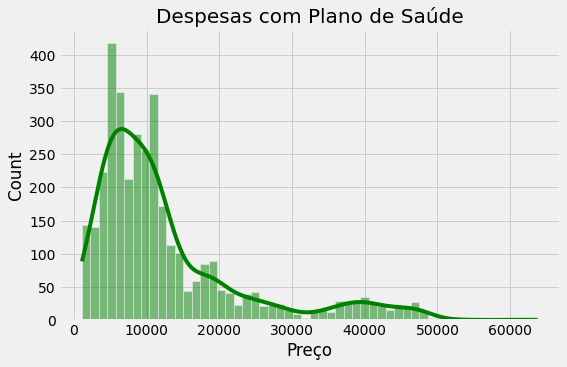

In [83]:
# Histogramas (contagem de frequência) dos preços dos planos de saúde:

plt.figure(figsize=(8,5))
sns.histplot(data['Preço'], kde=True, color='green')
plt.title('Despesas com Plano de Saúde', fontsize=20)
plt.show()

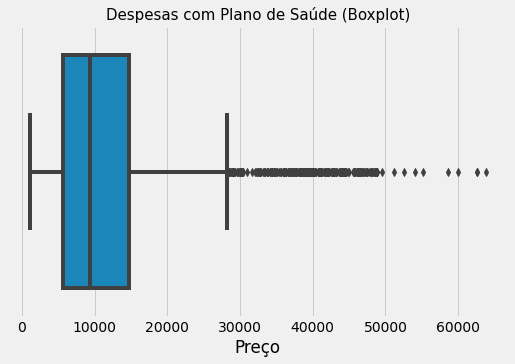

In [84]:
# Boxplot dos preços dos planos de saúde:
plt.figure(figsize=(8,5))
sns.boxplot(x=data['Preço'])
plt.title('Despesas com Plano de Saúde (Boxplot)', fontsize=15)
plt.show()

## Coluna Idade

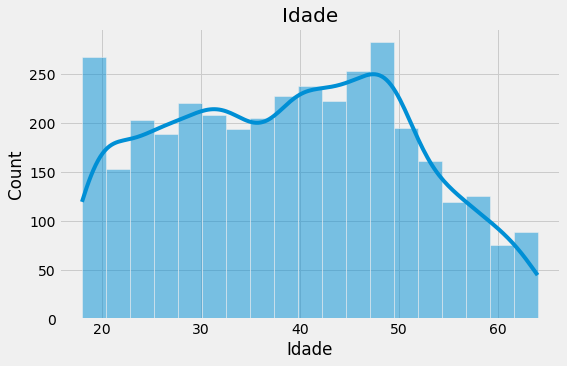

In [85]:
# Histograma da idades dos titulares dos planos de saúde 
plt.figure(figsize=(8,5))
sns.histplot(data['Idade'], kde=True)
plt.title('Idade', fontsize=20)
plt.show()

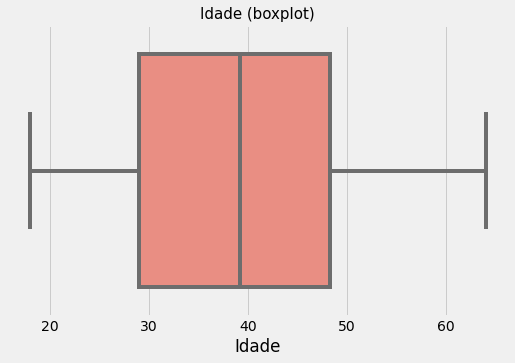

In [86]:
# Boxplot das idades dos beneficiários
plt.figure(figsize=(8,5))
sns.boxplot(x=data['Idade'], color='salmon')
plt.title('Idade (boxplot)', fontsize=15)
plt.show()

# Coluna Índice de Massa Corporal

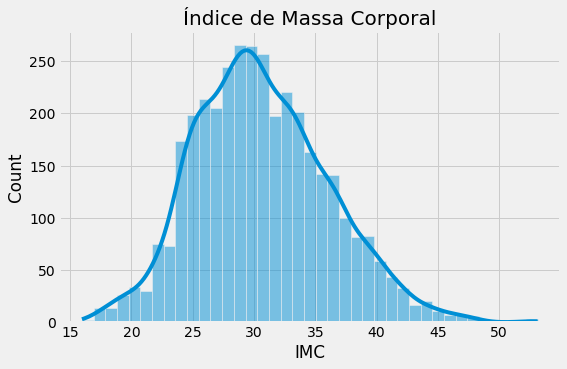

In [87]:
# Histogram of Body Mass Index
plt.figure(figsize=(8,5))
sns.histplot(data['IMC'], kde=True)
plt.title('Índice de Massa Corporal', fontsize=20)
plt.show()

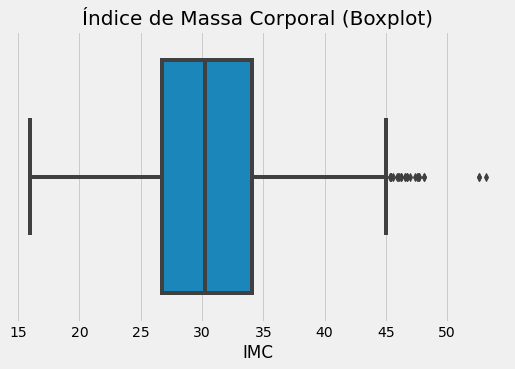

In [88]:
# Boxplot of Body Mass Index
plt.figure(figsize=(8,5))
sns.boxplot(x=data['IMC'])
plt.title('Índice de Massa Corporal (Boxplot)', fontsize=20)
plt.show()

## Coluna Dependentes

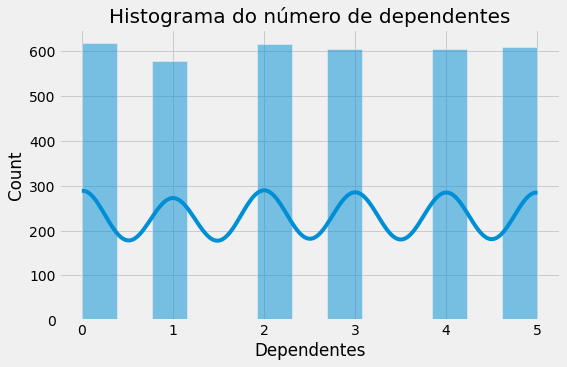

In [89]:
# Histograma dos do número de dependentes de cada cliente
plt.figure(figsize=(8,5))
sns.histplot(x=data['Dependentes'], kde=True)
plt.title('Histograma do número de dependentes', fontsize=20)
plt.show()

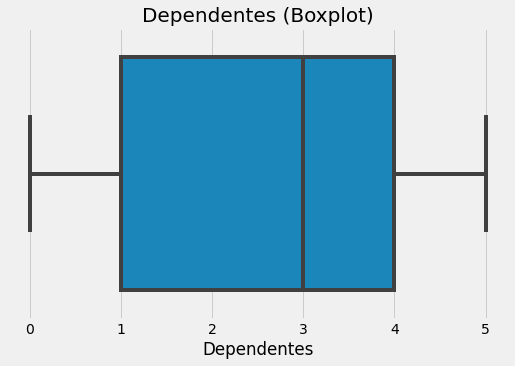

In [90]:
# Boxplot do número de dependentes
plt.figure(figsize=(8,5))
sns.boxplot(x=data['Dependentes'])
plt.title('Dependentes (Boxplot)', fontsize=20)
plt.show()

## Coluna Gênero

In [91]:
# Value Counts:
print(f'Male    : {data["Sexo"].value_counts()[0]}')
print(f'Female  : {data["Sexo"].value_counts()[1]}')

Male    : 2029
Female  : 1601


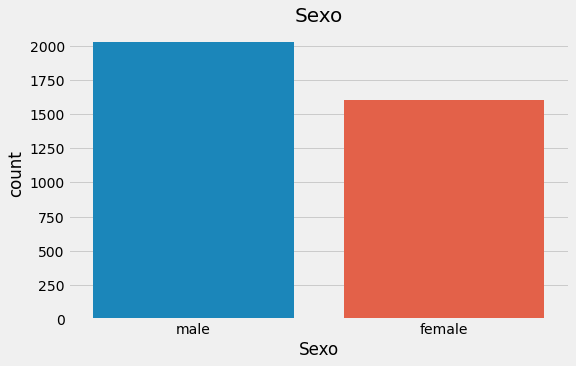

In [92]:
# Histograma é usado para variável QUANTITATIVA
# Countplot é usado para variável QUALITATIVA (ou Categórica)

# Visualization
plt.figure(figsize=(8,5))
sns.countplot(x=data['Sexo'])
plt.title('Sexo', fontsize=20)
plt.show()

# Coluna Região

In [93]:
# Quantidade de ocorrências em cada região:
print(f'South-East region  : {data["Região"].value_counts()[0]}')
print(f'North-West region  : {data["Região"].value_counts()[1]}')
print(f'South_West region  : {data["Região"].value_counts()[2]}')
print(f'North-West region  : {data["Região"].value_counts()[3]}')

South-East region  : 1021
North-West region  : 911
South_West region  : 850
North-West region  : 848


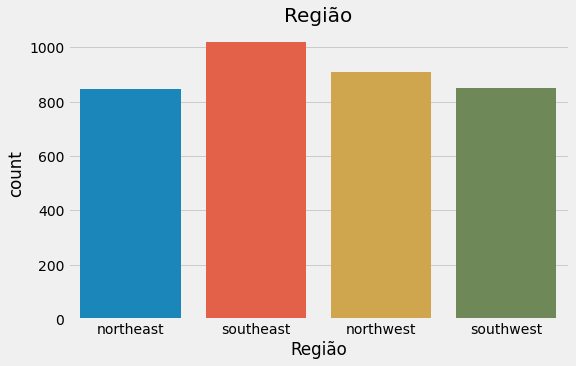

In [94]:
# Visualization
plt.figure(figsize=(8,5))
sns.countplot(x=data['Região'])
plt.title('Região', fontsize=20)
plt.show()

# Pré-Processamento dos Dados

In [95]:
data.head()

,Idade,Sexo,IMC,Fumante,Região,Dependentes,Preço
0,21.000000,male,25.745000,no,northeast,2,3279.868550
1,36.976978,female,25.744165,yes,southeast,3,21454.494239
2,18.000000,male,30.030000,no,southeast,1,1720.353700
3,37.000000,male,30.676891,no,northeast,3,6801.437542
4,58.000000,male,32.010000,no,southeast,1,11946.625900


In [96]:
# Arrendondando a coluna 'Idade'
data['Idade'] = round(data['Idade'])

In [97]:
# One-Hot Encoding: Transformar variáveis categóricas em númericas
data = pd.get_dummies(data, drop_first=True)

In [98]:
# Visualizando as duas primeiras linhas, depois de criar as variáveis dummies
data.head(2)

,Idade,IMC,Dependentes,Preço,Sexo_male,Fumante_yes,Região_northwest,Região_southeast,Região_southwest
0,21.0,25.745000,2,3279.868550,1,0,0,0,0
1,37.0,25.744165,3,21454.494239,0,1,0,1,0


In [99]:
# Rearranjando as colunas para facilitar a visualização e deixar a variável dependente (Preço) mais à direita:

data.columns = ['Idade', 'IMC', 'Dependentes', 'Preço', 'Sexo_m', 'Fumante',
       'Região_northwest', 'Região_southeast', 'Região_southwest']

In [100]:
# Confirmando se os procedimentos foram corretos
data.head(2)

,Idade,IMC,Dependentes,Preço,Sexo_m,Fumante,Região_northwest,Região_southeast,Região_southwest
0,21.0,25.745000,2,3279.868550,1,0,0,0,0
1,37.0,25.744165,3,21454.494239,0,1,0,1,0


In [101]:
# Dividindo entre atributos (features) independentes (X) e dependentes (y):

X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [102]:
# Observando as primeiras duas linhas do subdataset de variáveis independentes:
X.head(2)

,Idade,IMC,Dependentes,Preço,Sexo_m,Fumante,Região_northwest,Região_southeast
0,21.0,25.745000,2,3279.868550,1,0,0,0
1,37.0,25.744165,3,21454.494239,0,1,0,1


In [103]:
# Observando as primeiras duas linhas do subdataset de variáveis dependentes:
y.head(2)

0    0
1    0
Name: Região_southwest, dtype: uint8

In [104]:
# Train-Test Split:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

# Construção e Avaliação da Máquina Preditiva

## Vamos criar a metodologia de previsão do valor do custo do plano de saúde que é a própria máquina preditiva.

In [105]:
# Importing métricas de avaliação
from sklearn.metrics import mean_squared_error, r2_score

## Máquina Preditiva com Regressão Linear

In [106]:
# Algoritmo de Regressão Linear

from sklearn.linear_model import LinearRegression     
LinearRegression = LinearRegression()    
LinearRegression = LinearRegression.fit(X_train,y_train)   

# Previsão:
y_pred = LinearRegression.predict(X_test)

# Scores:
print(r2_score(y_test, y_pred))     
print(mean_squared_error(y_test, y_pred))

0.34992843474363244
0.11268913548396015


## Máquina Preditiva com Regressão Ridge

In [107]:
# Ridge
from sklearn.linear_model import Ridge
Ridge = Ridge()
Ridge = Ridge.fit(X_train, y_train)

# Previsão:
y_pred = Ridge.predict(X_test)

# Scores:
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))                       

0.3500277157592543
0.11267192523755293


## Máquina Preditiva com Regressão Lasso

In [108]:
# Lasso:
from sklearn.linear_model import Lasso
Lasso = Lasso()
Lasso = Lasso.fit(X_train, y_train)

# Previsão:
y_pred = Lasso.predict(X_test)

# Scores:
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

0.013813761371468503
0.17095421580760964


## Máquina Preditiva com Random Forest

In [109]:
# Random Forest Regressor:
from sklearn.ensemble import RandomForestRegressor
RandomForestRegressor = RandomForestRegressor()
RandomForestRegressor = RandomForestRegressor.fit(X_train, y_train)

# Previsão:
y_pred = RandomForestRegressor.predict(X_test)

# Scores:
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

0.6804807000262674
0.05538829201101928


### O algoritmo Random Forest foi o modelo que se saiu melhor, conseguindo o maior score r2 (0,68) e o menor mean_squared_error (0,05)

## Salvamento da Máquina Preditiva para Deploy ou implementação

In [110]:
# Criando um arquivo picle para salvar o modelo para uso futuro
import pickle
filename = 'Preço_Plano_de_Saude.pkl'
pickle.dump(RandomForestRegressor, open(filename, 'wb'))